In [149]:
import numpy as np
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt

In [150]:
sobel_horizontal = np.array([[-1, 0, 1],
                             [-2, 0, 2],
                             [-1, 0, 1]])
sobel_vertical = np.array([[1, 2, 1],
                           [0, 0, 0],
                           [-1, -2, -1]])

In [151]:
def apply_sobel(matrix):
    print(matrix.shape)
    print(sobel_horizontal.shape)
    print(sobel_vertical.shape)
    sobel_u = ndimage.convolve(matrix, sobel_horizontal)
    sobel_v = ndimage.convolve(matrix, sobel_vertical)
    return sobel_u, sobel_v

In [152]:
def load_image(filename):
    src = cv2.imread(filename, cv2.IMREAD_COLOR)
    src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
    return src

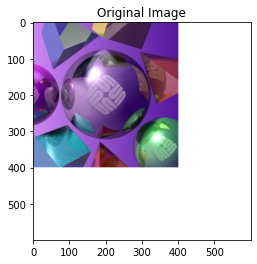

In [153]:
steel_spheres = load_image("steel_spheres.png")
ss_matrix = np.asarray(steel_spheres)

plt.title("Original Image")
plt.imshow(ss_matrix)
plt.show()

In [154]:
ss_b, ss_g, ss_r = ss_matrix[:400, :400, 0], ss_matrix[:400, :400, 1], ss_matrix[:400, :400, 2]

In [155]:
u_b, v_b = apply_sobel(ss_b)
u_g, v_g = apply_sobel(ss_g)
u_r, v_r = apply_sobel(ss_r)

(400, 400)
(3, 3)
(3, 3)
(400, 400)
(3, 3)
(3, 3)
(400, 400)
(3, 3)
(3, 3)


In [156]:
gxx = np.square(u_b) + np.square(u_g) + np.square(u_r)
gyy = np.square(v_b) + np.square(v_g) + np.square(v_r)
gxy = np.multiply(u_b, v_b) + np.multiply(u_g, v_g) + np.multiply(u_r, v_r)

print(gxx.shape)
print(np.max(gxx))
print(gxx)

(400, 400)
254
[[  0  48  48 ...  48  48   0]
 [  0  48  48 ...  48  48   0]
 [  0  48  48 ...  48  48   0]
 ...
 [  0   0   0 ... 209   5  42]
 [  0   0   0 ... 217 202  41]
 [  0   0   0 ...  18  67 113]]


In [157]:
a_1 = (2 * gxy)
a_2 = (gxx - gyy)
theta = .5 * np.arctan2(a_1, a_2)

print(theta.shape)
print(np.max(theta))
print(theta)

(400, 400)
0.785
[[0.      0.      0.      ... 0.      0.      0.     ]
 [0.      0.      0.      ... 0.      0.      0.     ]
 [0.      0.      0.      ... 0.      0.      0.     ]
 ...
 [0.      0.      0.      ... 0.5747  0.11523 0.7666 ]
 [0.      0.      0.      ... 0.536   0.6104  0.3535 ]
 [0.      0.      0.      ... 0.7544  0.526   0.785  ]]


In [158]:
r2d = 180/np.pi
c_1 = gxx + gyy
c_2 = (gxx - gyy) * np.cos(2 * theta)
c_3 = (2 * gxy) * np.sin(2 * theta)

f_x = np.sqrt((0.5 * (c_1 + c_2 + c_3)))

In [159]:
def standard_scale(matrix, scale):
    max_val = np.max(matrix)
    out_img = matrix / max_val
    out_img = out_img * scale
    return np.rint(out_img)


In [160]:
f_x = standard_scale(f_x, 360)
print(f_x)
print(np.max(f_x))

[[  0. 144. 144. ... 144. 144.   0.]
 [  0. 144. 144. ... 144. 144.   0.]
 [  0. 144. 144. ... 144. 144.   0.]
 ...
 [  0.   0.   0. ... 254. 242. 249.]
 [  0.   0.   0. ... 265. 251. 281.]
 [  0.   0.   0. ... 216. 194. 235.]]
360.0


In [161]:
s = np.full(f_x.shape, 0.5)
v = np.full(f_x.shape, 0.5)
print(f_x.shape)
print(s.shape)
print(v.shape)

(400, 400)
(400, 400)
(400, 400)


In [162]:
hsv_image = np.dstack((f_x, s, v)).astype('float32')
print(hsv_image.shape)

(400, 400, 3)


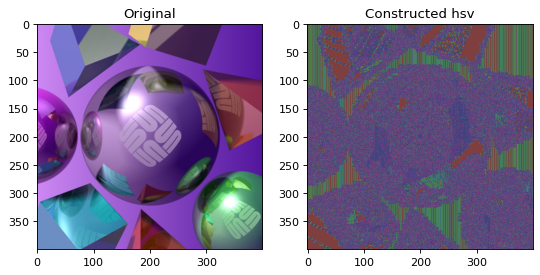

In [171]:
out = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)

plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.subplot(122)
plt.title("Constructed hsv")
plt.imshow(out)

plt.subplot(121)
plt.title("Original")
plt.imshow(ss_matrix[:400,:400,:])
plt.show()